## Multivariate Logistic Regression

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# creating a dataframe
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df['target'] = cancer['target']

# checking the head of the dataframe
cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [4]:
# splitting the data into x and y
X = cancer.data
y = cancer.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [5]:
# shuffling the data to avoid any bias
def shuffle_data(X, y):
    # Create an array of indices ranging from 0 to X.shape[0] - 1
    idx = np.arange(X.shape[0])
    # Shuffle the indices in place
    np.random.shuffle(idx)
    # Index X and y using the shuffled indices to return the shuffled matrix and labels
    return X[idx], y[idx]

X, y = shuffle_data(X, y)

In [6]:
# splitting the data into train ,dev and test sets
from sklearn.model_selection import train_test_split

# split the dataset into train/dev/test sets (60/20/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"y_test.shape: {X_test.shape}")
print(f"X_dev.shape: {X_dev.shape}")

X_train.shape: (341, 30)
y_test.shape: (114, 30)
X_dev.shape: (114, 30)


In [7]:
# scaling the data
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)

In [8]:
# checking for class imbalance
print('Number of samples in class 0: {}'.format(np.sum(y_train == 0)))
print('Number of samples in class 1: {}'.format(np.sum(y_train == 1)))

print('Proportion of samples in class 0: {}'.format(round(np.sum(y_train == 0) / len(y_train),2)))

Number of samples in class 0: 117
Number of samples in class 1: 224
Proportion of samples in class 0: 0.34


## Modelling

In [9]:
# implementing multivariate logistic regression from scratch
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        # Constructor to initialize hyperparameters
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Method to train the model using input matrix X and labels y
        n_samples, n_features = X.shape
        # initialize weights to 0
        self.weights = np.zeros(n_features)
        # initialize bias to 0 
        self.bias = 0 

        # Gradient descent optimization to update weights and bias
        for _ in range(self.n_iters):
            # compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
             # apply sigmoid activation function 
            y_predicted = self._sigmoid(linear_model)

            # compute gradient of weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) 
            db = (1 / n_samples) * np.sum(y_predicted - y)  

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Method to make predictions on input matrix X
        linear_model = np.dot(X, self.weights) + self.bias  # compute linear model
        y_predicted = self._sigmoid(linear_model)  # apply sigmoid activation function
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]  # threshold predicted probabilities
        return y_predicted_cls

    def _sigmoid(self, x):
        # Helper method to compute sigmoid activation function
        return 1 / (1 + np.exp(-x))


In [10]:
# training the model
model = LogisticRegression(learning_rate=0.0001, n_iters=1000)
model.fit(X_train, y_train)

# predicting the values
y_pred_dev = model.predict(X_dev)

## Model Evaluation

Dev set Confusion Matrix: 
TN, FP,
FN, TP

[[49  8]
 [ 1 56]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        57
           1       0.88      0.98      0.93        57

    accuracy                           0.92       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.92      0.92       114

0.9210526315789473




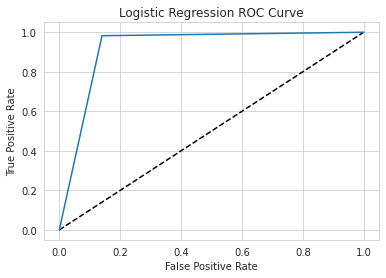

In [11]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

print("Dev set Confusion Matrix: \nTN, FP,\nFN, TP\n")
print(confusion_matrix(y_dev, y_pred_dev))
print(classification_report(y_dev, y_pred_dev))
print(accuracy_score(y_dev, y_pred_dev))

# plotting the roc curve
print("\n")
y_pred_prob = model.predict(X_dev)
fpr, tpr, thresholds = roc_curve(y_dev, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve for Dev set')
plt.show()

## Testing the Model on the Test Set

Test set Confusion Matrix: 
TN, FP,
FN, TP

[[32  6]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.92      0.95      0.94        76

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

0.9122807017543859




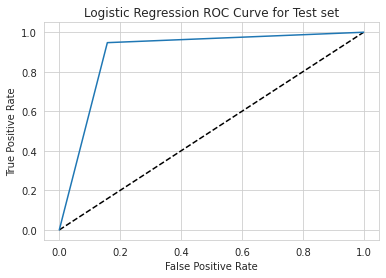

In [13]:
# testing the model on the dev set
y_pred_test = model.predict(X_test)

# Evaluating the model
print("Test set Confusion Matrix: \nTN, FP,\nFN, TP\n")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

# plotting the roc curve
print("\n")
y_pred_prob2 = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve for Test set')
plt.show()


The model performed well with accuracy of 91% and an F1-score of 94% on the test data